In [8]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

coin = 'BTC'

path = '/Users/wanjeans/github project/Funding_rate_Aave/'

# Load the uploaded CSV files
rates_data_path = path + 'Nasim/rates_data.csv'
dai_price_data_path = path + 'Nikan/prices/' + coin + 'USDT.csv'

# Read the CSV files into DataFrames
df_rates = pd.read_csv(rates_data_path)
df_dai_price = pd.read_csv(dai_price_data_path)

# Filter the rates data to only include rows for "DAI"
df_rates_dai = df_rates[df_rates['Symbol'] == "W"+coin]

print(df_dai_price.columns)

print((df_rates_dai==0).sum())

# Calculate the rate changes (difference from previous row)
borrowrate_columns = ["liquidityRate_avg", "variableBorrowRate_avg", "utilizationRate_avg", "stableBorrowRate_avg"]
df_rates_dai_change = df_rates_dai[borrowrate_columns].diff()



# Add the calculated changes to the rates DataFrame
df_rates_dai["liquidityRate_change"] = df_rates_dai_change["liquidityRate_avg"]
df_rates_dai["variableBorrowRate_change"] = df_rates_dai_change["variableBorrowRate_avg"]
df_rates_dai["utilizationRate_change"] = df_rates_dai_change["utilizationRate_avg"]
df_rates_dai["stableBorrowRate_change"] = df_rates_dai_change["stableBorrowRate_avg"]

# Calculate the return rate for the price data
df_dai_price["return_rate"] = df_dai_price["close"].pct_change(periods=6)
df_dai_price["return_rate_d"] = df_dai_price["close"].pct_change(periods=24)
df_dai_price["return_rate_3d"] = df_dai_price["close"].pct_change(periods=24*3)
df_dai_price["return_rate_week"] = df_dai_price["close"].pct_change(periods=24*7)
df_dai_price["return_rate_2week"] = df_dai_price["close"].pct_change(periods=24*14)
df_dai_price["return_rate_month"] = df_dai_price["close"].pct_change(periods=24*30)
df_dai_price["return_rate_2month"] = df_dai_price["close"].pct_change(periods=24*30*2)
df_dai_price["return_rate_3month"] = df_dai_price["close"].pct_change(periods=24*30*3)
df_dai_price["return_rate_6month"] = df_dai_price["close"].pct_change(periods=24*30*6)
df_dai_price["return_rate_8month"] = df_dai_price["close"].pct_change(periods=24*30*8)
df_dai_price["return_rate_12month"] = df_dai_price["close"].pct_change(periods=24*30*12)
# Merge the rates and price data on timestamp
df_combined = pd.merge(df_rates_dai, df_dai_price, left_on="Timestamp", right_on="timestamp")

# Calculate the correlation between rate changes and return rate
rate_change_columns = ["close","quote_asset_volume","liquidityRate_avg", "variableBorrowRate_avg", "utilizationRate_avg", "stableBorrowRate_avg", 
                       "liquidityRate_change", "variableBorrowRate_change", "utilizationRate_change", "stableBorrowRate_change"]
correlation = df_combined[["return_rate","return_rate_d","return_rate_3d","return_rate_week","return_rate_2week","return_rate_month","return_rate_2month","return_rate_3month","return_rate_6month","return_rate_8month","return_rate_12month"] + rate_change_columns].dropna()
correlation = correlation.corr()


Index(['Unnamed: 0', 'timestamp', 'open', 'high', 'low', 'close', 'volume',
       'close_time', 'quote_asset_volume', 'number_of_trades',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
       'ignore'],
      dtype='object')
Symbol                     0
Timestamp                  0
liquidityRate_avg         12
variableBorrowRate_avg    12
utilizationRate_avg        0
stableBorrowRate_avg       0
dtype: int64


In [59]:
correlation

,return_rate,return_rate_d,return_rate_3d,return_rate_week,return_rate_2week,return_rate_month,return_rate_2month,return_rate_3month,return_rate_6month,return_rate_12month,close,quote_asset_volume,liquidityRate_avg,variableBorrowRate_avg,utilizationRate_avg,stableBorrowRate_avg,liquidityRate_change,variableBorrowRate_change,utilizationRate_change,stableBorrowRate_change
return_rate,1.000000,0.508210,0.300021,0.190853,0.134581,0.097609,0.062710,0.046369,0.036886,0.041867,0.023738,0.029583,0.002318,0.009128,0.017328,0.016470,0.006706,-0.000973,0.007513,0.009453
return_rate_d,0.508210,1.000000,0.584048,0.378579,0.265057,0.194282,0.127747,0.096744,0.074787,0.077376,0.044597,0.041235,0.005770,0.016618,0.035314,0.033346,0.003551,-0.001860,-0.004244,-0.004360
return_rate_3d,0.300021,0.584048,1.000000,0.667625,0.455431,0.341400,0.223432,0.171014,0.132229,0.128307,0.076975,0.072913,0.004905,0.019567,0.060510,0.057205,0.000276,-0.002515,-0.003809,-0.002973
return_rate_week,0.190853,0.378579,0.667625,1.000000,0.697678,0.493010,0.327721,0.267400,0.196761,0.189611,0.114937,0.082007,0.003173,0.041421,0.105339,0.100494,0.001704,-0.001832,0.019925,0.020073
return_rate_2week,0.134581,0.265057,0.455431,0.697678,1.000000,0.681075,0.446188,0.381417,0.276149,0.242568,0.172442,0.076337,-0.005118,0.049931,0.143263,0.137608,-0.001732,-0.000625,0.004940,0.005649
return_rate_month,0.097609,0.194282,0.341400,0.493010,0.681075,1.000000,0.686852,0.550556,0.389073,0.355339,0.269156,0.083625,0.018919,0.076128,0.214855,0.209007,0.000671,0.000423,0.006965,0.007867
return_rate_2month,0.062710,0.127747,0.223432,0.327721,0.446188,0.686852,1.000000,0.799655,0.542037,0.385904,0.363829,0.098024,0.036584,0.100730,0.324107,0.323649,0.000140,-0.000916,-0.018437,-0.018378
return_rate_3month,0.046369,0.096744,0.171014,0.267400,0.381417,0.550556,0.799655,1.000000,0.630801,0.403149,0.433172,0.031795,0.032462,0.066821,0.321145,0.329796,0.000509,-0.000843,-0.021446,-0.020984
return_rate_6month,0.036886,0.074787,0.132229,0.196761,0.276149,0.389073,0.542037,0.630801,1.000000,0.340115,0.623624,-0.177287,-0.007774,-0.042465,0.386466,0.429030,-0.000599,-0.000847,-0.022614,-0.021359
return_rate_12month,0.041867,0.077376,0.128307,0.189611,0.242568,0.355339,0.385904,0.403149,0.340115,1.000000,0.674697,-0.186568,-0.058099,-0.150993,-0.166022,-0.142368,-0.000057,-0.000888,-0.024894,-0.024359


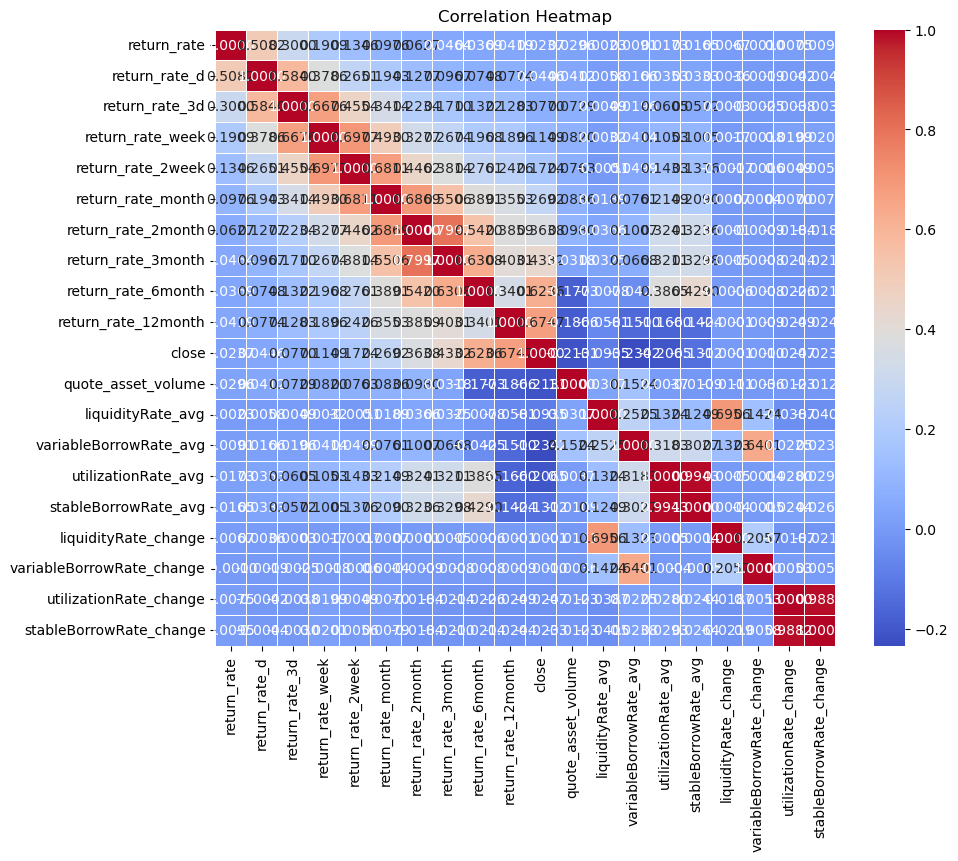

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = correlation

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size to your preference
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".4f")

# Show the heatmap
plt.title('Correlation Heatmap')
plt.show()


In [11]:
unique_symbols = df_rates['Symbol'].unique()
unique_symbols

array(['DAI', 'TUSD', 'USDC', 'USDT', 'SUSD', 'BAT', 'LINK', 'KNC', 'MKR',
       'MANA', 'ZRX', 'SNX', 'WBTC', 'BUSD', 'ENJ', 'REN', 'YFI', 'AAVE',
       'UNI', 'AUSDT', 'AWBTC', 'AWETH', 'AYFI', 'AZRX', 'AUNI', 'AAAVE',
       'ABAT', 'ABUSD', 'ADAI', 'AENJ', 'AKNC', 'ALINK', 'AMANA', 'AMKR',
       'AREN', 'ASNX', 'ASUSD', 'ATUSD', 'AUSDC', 'ACRV', 'AGUSD', 'ABAL',
       'AXSUSHI', 'ARENFIL', 'ARAI', 'AAMPL', 'AUSDP', 'ADPI', 'AFRAX',
       'AFEI', 'ASTETH', 'AENS', 'AUST', 'ACVX', 'A1INCH', 'ALUSD',
       'AAMMWETH', 'AAMMDAI', 'AAMMUSDC', 'AAMMUSDT', 'AAMMWBTC', 'WETH',
       'LUSD', 'CRV', 'BAL', 'ENS', '1INCH', 'FRAX'], dtype=object)

In [12]:
len(unique_symbols)

68

In [13]:
import pandas as pd
import numpy as np

def cal_corr(coin):
    path = 'E:/Funding_rate_Aave/'

    # Load the uploaded CSV files
    rates_data_path = path + 'Nasim/rates_data.csv'
    dai_price_data_path = path + 'Nikan/prices/' + coin + 'USDT.csv'

    try:
        # Read the CSV files into DataFrames
        df_rates = pd.read_csv(rates_data_path)
        df_dai_price = pd.read_csv(dai_price_data_path)
    except FileNotFoundError:
        # Return a DataFrame with NaN values if the file is not found
        rate_change_columns = ["liquidityRate_avg", "variableBorrowRate_avg", "utilizationRate_avg", "stableBorrowRate_avg", 
                            "liquidityRate_change", "variableBorrowRate_change", "utilizationRate_change", "stableBorrowRate_change"]
        return_rate_column = ["return_rate"]
        all_columns = return_rate_column + rate_change_columns
        return pd.DataFrame(np.nan, index=[0], columns=all_columns).corr()

    # Filter the rates data to only include rows for "DAI"
    df_rates_dai = df_rates[df_rates['Symbol'] == coin]

    # Calculate the rate changes (difference from previous row)
    borrowrate_columns = ["liquidityRate_avg", "variableBorrowRate_avg", "utilizationRate_avg", "stableBorrowRate_avg"]
    df_rates_dai_change = df_rates_dai[borrowrate_columns].diff()

    # Add the calculated changes to the rates DataFrame
    df_rates_dai["liquidityRate_change"] = df_rates_dai_change["liquidityRate_avg"]
    df_rates_dai["variableBorrowRate_change"] = df_rates_dai_change["variableBorrowRate_avg"]
    df_rates_dai["utilizationRate_change"] = df_rates_dai_change["utilizationRate_avg"]
    df_rates_dai["stableBorrowRate_change"] = df_rates_dai_change["stableBorrowRate_avg"]

    # Calculate the return rate for the price data
    df_dai_price["return_rate"] = df_dai_price["close"].pct_change(periods=6)

    # Merge the rates and price data on timestamp
    df_combined = pd.merge(df_rates_dai, df_dai_price, left_on="Timestamp", right_on="timestamp")

    # Calculate the correlation between rate changes and return rate
    rate_change_columns = ["liquidityRate_avg", "variableBorrowRate_avg", "utilizationRate_avg", "stableBorrowRate_avg", 
                        "liquidityRate_change", "variableBorrowRate_change", "utilizationRate_change", "stableBorrowRate_change"]
    correlation = df_combined[["return_rate"] + rate_change_columns].dropna()
    correlation = correlation.corr()
    
    return correlation

In [14]:
import numpy as np
np.size(cal_corr('BTC'))

81

In [15]:
corr_result = np.zeros((len(unique_symbols),9,9))
np.size(corr_result)

5508

In [16]:
for i in range(0,len(unique_symbols)):
    corr_result[i] = cal_corr(unique_symbols[i])

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

cumulative_data = correlation.fillna(0)
valid_data_count = 0

for i in range(0, len(unique_symbols)):
    data = cal_corr(unique_symbols[i])
    if not data.isna().any().any():
        cumulative_data += data  # 累加每次的 9x9 DataFrame
        valid_data_count += 1    # 记录有效数据的次数
    if pd.notna(data['return_rate']['return_rate']):
        plt.figure(figsize=(10, 8))

        # Create a heatmap using seaborn to visualize the correlation matrix
        sns.heatmap(data, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

        # Add title and labels
        plt.title('Correlation Matrix Heatmap with Coin: ' + unique_symbols[i])
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.yticks(rotation=0)  # Keep y-axis labels horizontal
        
        plt.show()
        

# 检查是否有有效数据
if valid_data_count > 0:
    # 计算 data 的平均值
    average_data = cumulative_data / valid_data_count

    # 显示平均 heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(average_data, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

    # 添加标题和标签
    plt.title('Average Correlation Matrix Heatmap Across Symbols')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.show()